<a href="https://colab.research.google.com/github/AiDAPT-A/2024-Q3-ai-in-architecture/blob/main/tutorials/2_from_3D_to_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **From 3D to 2D: DataFrame Creation from BIM Files**

Last week, we learned how to deal with tuples, lists, arrays, and polygons. We also got familiar with how to modify simple shapes and finally plot them! In other words, we stored the properties of shapes in an array of polygons. One step further, we want to store ***the properties of real buildings*** (not necessariliy simple shapes) in another data storage option called ***DataFrame***. So, in this tutorial, we are going to learn how to create DataFrames from BIM files, going through the intermediate steps of IFC (Industrial Foundation Classes) and CSV (Comma-separated values) files. To navigate from IFC to CSV file formats, we will get to know a newly developed solution called ***BatchPlan***!

Today, we will mostly focus on the last arrow (i.e., from CSV to DataFrame). Once we have the DataFrame, we can do all the funny stuff, including *pretty visualizations*.✨


<center>
<img src="https://drive.google.com/uc?export=view&id=1o8oA6rBSvo6zL7NAwHCg9NmP_SlRkHIP" alt="floor-layout" class="center" width="750px">
</center>


## 📌 **Overview and learning objectives**

This tutorial is about the transition from the conventional method of storing building data (through BIM and IFC files) to the more machine-readable formats (CSV files and DataFrames). The ultimate aim is to come up with a ***(Geo)DataFrame*** of a number of residential building projects from KAAN Architecten.

### 🧠 **Learning objectives**
*   Making use of IFC files to create a DataFrame
*   Cleaning Data (reading, sorting, and selecting)
*   Visualizing FloorPlans

### 🐍 **New in Python**
- Mounting Google Drive in Google Colaboratory
- Creating a (Geo)DataFrame
- Plotting Multypolygons
- libraries: pandas, geopandas

### ⛩ [**BatchPlan**](#t1)
- [1.1 Introduction](#t1.1)
- [1.2 KAAN Residential Projects](#t1.2)
- [1.3 Loading Data](#t1.3)

### 🌐 [**GeoDataFrame**](#t2)
- [2.1 Pandas DataFrame](#t2.1)
- [2.2 Cleaning Data](#t2.2)
- [2.3 GeoDataFrame Creation](#t2.3)
- [2.4 Floor plan Visualization](#t2.4)

### 🟡 [**Additional Geopandas (optional)**](#t3)
- [3.1 Maps and Plots](#t3.1)
- [3.2 Geometric Manipulation](#t3.2)
- [3.3 Operations with Overlay](#t3.3)

### 📊 [**Exercise**](#t4)


<a name="t1"></a>
## ⛩ **BatchPlan**

Here we get familiar with BatchPlan and its features, KAAN residential projects (which are our material to work with), and learn how to load files from the Google Drive.

<a name="t1.1"></a>
### 1.1 **Introduction**


BatchPlan is a large-scale solution for ***floor plan extraction*** of buildings' IFC files. The proposed solution is developed to address the challenge of analysing ***big data*** during a data-driven design process, utilizing the conventional method of data storage in the building industry (i.e., IFC files). The main novelties of BatchPlan are as follows:

- Introducing an **open-source**, customizable, and flexible solution for floor plan extraction in large scale
- Enabling **visual** (floorplans), **geometrical** (room- and unit-wise coordinates), and numerical (area, volume, etc.) outputs data format
- Batch-processing **large** IFC files
- Facilitating large-scale quantitative analysis and **Machine Learning-based workflows**


<center>
<img src="https://drive.google.com/uc?export=view&id=13sSbQQZMMlwUWVqdvLKif0UN1NdfgOhl" alt="isometric" class="center" width="750px">
</center>

More information about the BatchPlan can be found [here](https://carbonimage.github.io/).

Refresh: What was ***IFC*** again?

The Industry Foundation Classes (IFC) format file is an open file format used by ***BIM programs***, including spatial elements, materials, and shapes of a building. The majority of BIM modelling software, including Revit, ArchiCAD, and Rebro, currently supports the import and export of IFC files. IFC files are intended to be *platform-independent*, and therefore play an information exchanger role. This would allow interoperability between various BIM programs, as well as between BIM and other tools such as LCA (Life Cycle Assessment).

<a name="t1.2"></a>
### 1.2 **KAAN Residential Projects**

For the material in this tutorial, we will use data from KAAN Architecten projects. Several residential projects have been selected to encompass various design stages, ranging from early design to project construction.
The projects are titled ***De Zalmhaven, The Stack (Overhoeks), Lumiere, SPOT, and Strijp S- Match box***. More information on the projects can be found [here](https://kaanarchitecten.com/type/residential/).


Here is the Strijp S - Matchbox Project located in Eindhoven:

<center>
<img src="https://drive.google.com/uc?export=view&id=1j0bJWwaRcaP8DFXcwhYAoFcCrwaDYMLW" alt="isometric" class="center" width="750px">
</center>


As an example, we take the third floor of the ***Strijp S - Match Box*** project, whose isometric view looks like this:


<center>
<img src="https://drive.google.com/uc?export=view&id=1Qo9jf2_jWEwU6YsaF4eqXKeDEmQ-Sd6o" alt="isometric" class="center" width="750px">
</center>

and its floor plan:

<center>
<img src="https://drive.google.com/uc?export=view&id=1jfIhODIOg7i5fr6VfW093rv8NKKypMo2" alt="floor-plan" class="center" width="750px">
</center>

both above images are ***the output of BatchPlan***. But these are not the only outputs! We will see other output types later on in this tutorial.


<a name="t1.3"></a>
### 1.3 **Loading Data**

 We are aiming to make use of the available data files to create our very first DataFrame. Normally, datasets are released in Comma-separated value (.csv) files. Therefore, it is practical to load and read this file format to make use of them in programming platforms. We first need to load the raw data from our data storage (in this case Google Drive) to the compute platform (in this case Google Colab). Here we mount the Google Drive to use the stored files in this notebook. Long story short, we mount the drive to make ***connection between Drive and Colab***.
<center>
<img src="https://drive.google.com/uc?export=view&id=1L5A992d1NolfYRO3lo-NjGBmO0b4rhCH" alt="isometric" class="center" width="600px">
</center>


We use the **os** module (short form for Operating System) to open the desired folder in the drive and ***navigate through the directories*** (i.e., paths, addresses, where the files are stored). The OS module in Python provides functions for interacting with the operating system.

In [ ]:
#importing drive and os libraries
from google.colab import drive
import os

Here we go mounting/ setting up Google Drive:

In [ ]:
#mounting google drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


It's always nice to know where we stand (in life in general and also while programming). For that we use a practical function called **getcwd** (short form for "get current working directory"). This function is handy when we are lost in the directories (or just curious) and want to know our location.

In [ ]:
#checking the current working directory
os.getcwd()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-262-e2b8ccd28f09>", line 2, in <cell line: 2>
    os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPython/c

So there we are. Next, we can copy the path of the desired folder in the left side bar of this notebook (the folder icon), ***Files/Drive/Mydrive*** and then whichever folder we are looking for. Here you can copy the files related to your project from this shared folder, somewhere in your own Drive and then copy the path of that folder in the code cell below as the "path" variable.

In [ ]:
#giving the directory of the files
path = "/content/drive/MyDrive/KAAN_Projects/Strijp_S/general_csv"
# using chdir for changing the directory to the path we look for
os.chdir(path)

Care to check the current working directory again to make sure we are in the right place?

In [ ]:
#checking the current working directory
os.getcwd()

'/content/drive/MyDrive/KAAN_Projects/Strijp_S/general_csv'

-The place you wanted to end up? Yes? -Nice. -No? -Then use **.chdir** again.

<a name="t2"></a>
## 🌐 **GeoDataFrame**
Now that we landed in a folder where we have our building project files, it's time to take our first baby steps towards creating a DataFrame ^^ Here we learn how to create ***Pandas*** DataFrame, read, sort, and select the intended data, create a ***GeoDataFrame***, and visualize floor plans.


<a name="t2.1"></a>
### 2.1 **Pandas DataFrame**

In order to make an efficient analysis on big data of several buildings, it is beneficial to create a so-called clean DataFrame. One of the most practical libraries to deal with DataFrames is **pandas**, an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. A DataFrame contains labeled axes (rows and columns).
<center>
<img src="https://runcode-app-public.s3.amazonaws.com/images/pandas-online-editor-compiler.original.png" alt="isometric" class="center" width="550px">
</center>
The Pandas' highlights are as follows:


*   A fast and efficient DataFrame object for **data manipulation**
*   Tools for reading and writing data between **different formats**: CSV and text files, Microsoft Excel, etc
*   Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
*   **Size mutability** by inserting and deleting columns
*   High performance **merging and joining** of data sets

We will go through a number of pandas features in this tutorial, but if you are still curious to know more and want to play around, [here is a nice pandas cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf). *Wait what is a cheat sheet?* A cheat sheet is a concise set of notes used for quick reference.

Mentioning the point above, we can understand the difference of ***storing big data*** of building project in DataFrames, rather than in arrays, or lists that we already learned. Of course all have their own applications, but let's *feel* the diffrence in the following cells! First, we need to import the library.



In [ ]:
#importing pandas library (but we will later call it with the nickname we chose for it, here: pd)
import pandas as pd
#importing numpy library
import numpy as np

We already got familiar with the array data type. With pd.Dataframe, we can creat **a DataFrame object** from the arrays. Normally, with only **data** and **column** specification as parameters we can quickly define a DataFrame. However, there are more parameters we can define. Curious? then check [the pandas.DataFrame documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

In [ ]:
#constructing DataFrame from numpy ndarray
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])
#taking a look at the DataFrame just by typing its name
df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


So this is how a simple DataFrame looks like. One of the practical functions that pandas offer to ***iterate through the DataFrame*** is ***.loc***, which helps accessing a group of values using labels. Now we are going to combine this function with the "for loop" we already learned. Let's assume we want to go through each row of the DataFrame and select rows from specified columns (i.e., labels). First, we need to know ***how many rows*** are there in the DataFrame to specify the range of the for loop. We do this by using len().

In [ ]:
len(df)

3

In [ ]:
#iterate through each row and select 'b' and 'b' column respectively
for i in range(len(df)):
    print(df.loc[i, "b"], df.loc[i, "c"])

2 3
5 6
8 9


A similar function but with different parameters is iloc(), which helps accessing a  group of rows and columns by integer position(s). Here, we want to go through each row and print first and third column. (which is translated into 0th and 2nd, in programming language)

In [ ]:
#iterate through each row and select
# 0th and 2nd index column respectively.
for i in range(len(df)):
    print(df.iloc[i, 0], df.iloc[i, 2])

1 3
4 6
7 9


So we saw that a DataFrame is not a big deal (***for now :)***). It looks like a table, and indeed the DataFrame object is a "tabular data" format. But the story does not end here. Now we want to create a DataFrame from the csv files that we have stored in the Google Drive. Now that the Drive has been already mounted, the only thing to do is to ***read*** the intended file. If we have a certain naming convention among the files that we want to load, it is easier to only use the variant part as the variable, and keep the repetitive part of the names as fixed. In the following example, we assume that we have the naming convention of "filename" + ".csv". After writing the project's name as the "project_name" variable, we can use the ***read.csv*** function of Pandas to load the desired file.

In [ ]:
#name of the file as the variable
project_name = "STRIJP-KAAN-ZZ-ZZ-M-A-0101"
#reading a comma-separated values (csv) file into DataFrame
StrijpS_df = pd.read_csv(project_name+".csv")

<ipython-input-210-ebe7f6177eaf>:4: DtypeWarning: Columns (10,11,12,15,16,17,20,21,22,23,25,26,28,31,43,44,46,47,50,51,52,53,55,56,57,60,61,62,64,65,67,68,72,73,74,78,79,81,82,83,84,85,90,92,94,97,99,100,104,107,109,113,116,117,122,123,126,127,129,130,132,133,148,150,152,157,158,160,168,169,174,176,178,180,182,184,186,187,189,190,194,198,201,207,208,210,215,216,217,221,230,232,233,234,238,239,242,246,257,260,261,262,266,272,275,278,280,281,283,284,286) have mixed types. Specify dtype option on import or set low_memory=False.
  StrijpS_df = pd.read_csv(project_name+".csv")


Here we have created a DataFrame with the name "StrijpS_df". ***Tip:*** if we highlight the objects and keep the cursor, the type is shown (ex: StrijpS_df is a DataFrame, as we wanted it to be, luckily). This comes in handy when we doubt about the data type of a certain variable.

Next, we will get familiarized with the data and learn how to clean the DataFrame.

<a name="t2.2"></a>
### 2.2 **Cleaning Data**


Data cleaning is performed for ***data consistency***. In data cleaning process, redundant data is removed and incorrect, incomplete, irrelevant, or improperly formatted data is modified. The data cleaning extends to fixing spelling and syntax errors, and standardizing data. It is also tailored towards the selection, manipulation, and format processing of for the downstream task.

But wait a second, how do we know what to clean and to what extent we need to clean (in plain English, is it simply *dusting* or is it *deep cleaning*?) The preliminary step to clean the data, is ***to get to know the raw data***. For instance, the data types that the file contains, the features (the columns), the first and last few rows of the DataFrame, and the number of unique items per feature. So basically, by ***cleaning*** we mean: ***reading, sorting, and selecting data***. The following cells will help getting familiar with the DataFrame and make it ready for the subsequent steps.


In [ ]:
#printing a concise summary of a DataFrame
StrijpS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Columns: 288 entries, Unnamed: 0 to KAAN_ILS Summary.id
dtypes: float64(169), int64(2), object(117)
memory usage: 15.4+ MB


In [ ]:
len(StrijpS_df)

7000

Based on the results of the last function, we know that the DataFrame has a certain number of columns. Mostly, we are interested in knowing ***the features*** a DataFrame affords. Therefore, it is also useful to get a list of column names. Next, we can decide which columns to keep and which to ignore based on our desired task.

In [ ]:
#printing the list of features
list(StrijpS_df.columns)

['Unnamed: 0',
 'ExpressId',
 'GlobalId',
 'Class',
 'PredefinedType',
 'Name',
 'Level',
 'x_coordinate',
 'y_coordinate',
 'z_coordinate',
 'Type',
 'Material',
 'Pset_SlabCommon.LoadBearing',
 'Qto_SpaceBaseQuantities.NetVolume',
 'KAAN_Qtos.Volume',
 'Pset_SpaceCoveringRequirements.FloorCovering',
 'Pset_BuildingStoreyCommon.AboveGround',
 'Qto_WallBaseQuantities.K_g2_brick_running_240x70mm',
 'Qto_StairFlightBaseQuantities.Length',
 'Qto_ColumnBaseQuantities.GrossVolume',
 'Qto_WallBaseQuantities.K_h2_Metal stud profiling',
 'Qto_WallBaseQuantities.K_i0_CLT Wood',
 'Pset_OpeningElementCommon.Reference',
 'Pset_BeamCommon.LoadBearing',
 'KAAN_ILS Summary.3.4 IFC Entiteit | IFC Class',
 'Pset_BeamCommon.FireRating',
 'Qto_SlabBaseQuantities.K_00_Air substructure',
 'Qto_SlabBaseQuantities.id',
 'Qto_WallBaseQuantities.K_f7_Stucco (2)',
 'Pset_StairCommon.WalkingLineOffset',
 'Qto_BeamBaseQuantities.id',
 'Pset_WindowCommon.IsExternal',
 'KAAN_Qtos.OpenablePart_Height',
 'Pset_SpaceC

Alright there are many of columns, apparently. But let's move on to the DataFrame itself, cause it contains also rows ***and*** columns. We can already imagine that this is a huge (relatively) DataFrame due to the number of columns. Therefore, it's always practical to check a part of the DataFrame before observing the whole. Here we use two handy functions to take a quick look at ***the first and last few rows of the DataFrame***, using .head() and .tail() functions, respectively. As we earlier saw, the DataFrame would ultimately look like a table (a fancy one, in this case).

In [ ]:
#getting the first 5 rows of the DataFrame
StrijpS_df.head()

,Unnamed: 0,ExpressId,GlobalId,Class,PredefinedType,Name,Level,x_coordinate,y_coordinate,z_coordinate,...,Pset_ManufacturerTypeInformation.Manufacturer,KAAN_ILS Summary.4.6 Geluidisolatie | Acoustic Value,Qto_WallBaseQuantities.K_i2_Wood_planks_240mm_vertical,Qto_WallBaseQuantities.K_i2_Wood_planks_240mm_vertical (2),Pset_FurnitureTypeCommon.id,Pset_DoorCommon.IsExternal,Pset_BuildingCommon.Reference,Qto_BuildingElementProxyQuantities.NetVolume,Pset_RailingCommon.IsExternal,KAAN_ILS Summary.id
0,0,97,0CfLBxMtb1CPqMkok2OeNY,IfcBuilding,NaN,<Building name>,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Project Information,NaN,NaN,494049.0
1,1,100,0CfLBxMtb1CPqMkojzdNia,IfcBuildingStorey,Level:Standard,00 begane grond,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,493977.0
2,2,104,0aJAQrAJnAmBa0GD07waS7,IfcBuildingStorey,Level:Standard,01 eerste verdieping,NaN,0.0,0.0,3700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,493984.0
3,3,108,0aJAQrAJnAmBa0GD07waSC,IfcBuildingStorey,Level:Standard,02 tweede verdieping,NaN,0.0,0.0,7400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,493991.0
4,4,112,0aJAQrAJnAmBa0GD07waSt,IfcBuildingStorey,Level:Standard,03 derde verdieping,NaN,0.0,0.0,11100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,493998.0


Note that the middle columns are not shown cause they are too many. However, it doesn't mean that we lost them or so. They are there, but we don't see them. Now let's see the last few rows.

In [ ]:
#getting the last 5 rows of the DataFrame
StrijpS_df.tail()

,Unnamed: 0,ExpressId,GlobalId,Class,PredefinedType,Name,Level,x_coordinate,y_coordinate,z_coordinate,...,Pset_ManufacturerTypeInformation.Manufacturer,KAAN_ILS Summary.4.6 Geluidisolatie | Acoustic Value,Qto_WallBaseQuantities.K_i2_Wood_planks_240mm_vertical,Qto_WallBaseQuantities.K_i2_Wood_planks_240mm_vertical (2),Pset_FurnitureTypeCommon.id,Pset_DoorCommon.IsExternal,Pset_BuildingCommon.Reference,Qto_BuildingElementProxyQuantities.NetVolume,Pset_RailingCommon.IsExternal,KAAN_ILS Summary.id
6995,6995,517673,2tUVg4MA6VP$A643zQ7bW7,IfcOpeningElement,OPENING,K_32_DO_WB_Single:DO.xxxx_1040x2160mm:4946117:1,NaN,37110.0,12760.0,20550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6996,6996,517694,2jaTPaGWHetDmamrl44Lib,IfcOpeningElement,OPENING,K_32_DO_WB_Single:DO.xxxx_1040x2160mm:4946126:1,NaN,38165.0,11230.0,20550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6997,6997,517715,3YAJ38x7vu7Ds_R2ra7b3f,IfcOpeningElement,OPENING,K_32_DO_WB_Single:DO.xxxx_1040x2600mm:4983221:1,NaN,24450.0,26070.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6998,6998,517736,1D9Yxbxlr_woI3XwVBNGf2,IfcOpeningElement,OPENING,K_32_DO_WB_Single door:DO.xxxx_1250x2300mm:504...,NaN,42785.0,10695.0,11100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6999,6999,517757,24ZM$4TvuTdFxLWYYz6Yf0,IfcOpeningElement,OPENING,K_32_DO_WB_Single door:DO.xxxx_1250x2300mm:504...,NaN,42785.0,12095.0,11100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After grasping an overal idea of the content, we can clean the DataFrame based on the specified task requirements. One step of the cleaning process is **to get rid of unwanted columns**. Some columns of the rawdata DataFrame are selected to keep as an example in the following cell. Then the DataFrame is shown (note that if we do not specify the head or the tail of the dataset, both are shown).

In [ ]:
#defining a new DataFrame which is a sub DataFrame of the main one. So, no worries, we will never lose the data we frist loaded.
selected_df = StrijpS_df[['Class', 'PredefinedType', 'Level', 'x_coordinate', 'y_coordinate','z_coordinate', 'Material']]
selected_df

,Class,PredefinedType,Level,x_coordinate,y_coordinate,z_coordinate,Material
0,IfcBuilding,NaN,NaN,0.0,0.0,0.0,NaN
1,IfcBuildingStorey,Level:Standard,NaN,0.0,0.0,0.0,NaN
2,IfcBuildingStorey,Level:Standard,NaN,0.0,0.0,3700.0,NaN
3,IfcBuildingStorey,Level:Standard,NaN,0.0,0.0,7400.0,NaN
4,IfcBuildingStorey,Level:Standard,NaN,0.0,0.0,11100.0,NaN
...,...,...,...,...,...,...,...
6995,IfcOpeningElement,OPENING,NaN,37110.0,12760.0,20550.0,NaN
6996,IfcOpeningElement,OPENING,NaN,38165.0,11230.0,20550.0,NaN
6997,IfcOpeningElement,OPENING,NaN,24450.0,26070.0,0.0,NaN
6998,IfcOpeningElement,OPENING,NaN,42785.0,10695.0,11100.0,NaN


Did you notice that ***the size of the DataFrame*** has changed? Let's keep the track of this change also later on.

Sometimes we are interested in the number of ***unique values*** in certain columns. Also, we might need a list of unique values in a certain column (and not necessarily the number of them). The following cells will go through the abovementioned applications.

In [ ]:
#printing the number of unique ids in the selected DataFrame using the .nunique function
print(selected_df.nunique())

Class              23
PredefinedType     23
Level             182
x_coordinate      681
y_coordinate      636
z_coordinate      188
Material           82
dtype: int64


We can also refer to a certain column in the pandas DataFrame simply by putting a dot after the DataFrame's name. Let's assume we are interested to know what kind of materials have been used in the third floor of the Strijp S project. So once we talk about ***what kind***, it would be translated into ***the unique values***.

In [ ]:
#printing the list of unique values in a certain column (here: Material) using the .unique function
print(selected_df.Material.unique())

[nan '<Unnamed>' 'K_i2_softwood' 'K_f2_concrete_in-situ'
 'Floor:K_23_FL_Wood CLT_240mm' 'K_i0_CLT Wood' 'K_i2_softwood_horizontal'
 'Floor:K_23_FL_Concrete_205mm' 'K_i3_Hardwood vertical_azobe'
 'K_m1_Insulation_Mineral wool' 'K_i3_Hardwood horizontal_azobe'
 'Basic Wall:K_21_WA_Aluminium framework_100mm'
 'Basic Wall:K_21_WA_Wood_190mm' 'Floor:K_27_FL_Soil+grass_300mm'
 'Basic Wall:K_21_WA_Wood+Insulation_220mm'
 'Basic Wall:K_22_WA_Metalstud_dubbel_2.75-75.2_360mm'
 'Basic Wall:K_22_WA_Metalstud_2.75-75.2_205mm'
 'Basic Wall:K_22_WA_Metalstud_2.105.2_155mm'
 'Basic Wall:K_22_WA_Metalstud_2.50.2_100mm'
 'K_00_Clash material_Operation zone'
 'Floor:K_43_FL_Floor tiles_50x50mm_15mm'
 'Basic Wall:K_22_WA_Brickwork_150mm'
 'Basic Wall:K_22_WA_Metalstud_2.75_100mm'
 'Basic Wall:K_22_WA_Brickwork_220mm' 'K_i0_Wood_strip_125x1000mm'
 'Floor:K_23_FL_Concrete+screed_205mm'
 'Basic Wall:K_41_WA_Insulation_180mm'
 'Basic Wall:K_22_WA_Metalstud_2.80_110mm'
 'K_generic_clash material_operation' '

What is the first material? Have you ever worked with that? I bet no.

In computing, NaN, standing for Not a Number, is a particular value of a numeric data type which is undefined as a number. If we are interested in keeping the rows with actual values (in other words, ***rows without NaN values***), we can apply the **dropna()** function over the DataFrame.

In [ ]:
#dropping the rows including NaN values
clean_df= selected_df.dropna()

#let's see what happened
clean_df
#pay attention to the reduced number of rows after filtering data

,Class,PredefinedType,Level,x_coordinate,y_coordinate,z_coordinate,Material
421,IfcBuildingElementProxy,NOTDEFINED,00 begane grond,0.0,0.0,0.0,<Unnamed>
422,IfcColumn,COLUMN,00 begane grond,0.0,0.0,0.0,K_i2_softwood
423,IfcColumn,COLUMN,00 begane grond,0.0,0.0,0.0,K_i2_softwood
424,IfcColumn,COLUMN,00 begane grond,0.0,0.0,0.0,K_i2_softwood
425,IfcColumn,COLUMN,00 begane grond,0.0,0.0,0.0,K_i2_softwood
...,...,...,...,...,...,...,...
6081,IfcBeam,BEAM,03 derde verdieping,0.0,0.0,0.0,K_i3_Hardwood horizontal_azobe
6082,IfcBeam,BEAM,03 derde verdieping,0.0,0.0,0.0,K_i3_Hardwood horizontal_azobe
6083,IfcSlab,FLOOR,03 derde verdieping,0.0,0.0,11100.0,Floor:K_23_FL_Screed+insulation_160mm
6084,IfcSlab,FLOOR,03 derde verdieping,0.0,0.0,11100.0,Floor:K_23_FL_Screed+insulation_160mm


<a name="t2.3"></a>
### 2.3 **GeoDataFrame Creation**

GeoPandas is an open source project to add support for geographic data to pandas objects. The goal of GeoPandas is to make working with ***geospatial data*** in python easier. It combines the capabilities of ***pandas*** and ***shapely*** (a library for manipulating geometric objects, get more information [here](https://shapely.readthedocs.io/en/stable/manual.html#introduction)) libraries, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. Have you noticed the difference between the icons of ***Pandas*** and ***GeoPandas*** libraries?
<center>
<img src="https://geopandas.org/en/stable/_images/geopandas_logo.png" alt="isometric" class="center" width="750px">
</center>


All the following cells about Geopandas are the summary of the library's documentation which can be accessed [here](https://geopandas.org/en/stable/docs.html). But let's see what is GeoPandas about by first importing it.

In [ ]:
#importing the geopandas library
import geopandas as gpd


GeoPandas implements two main data structures, a ***GeoSeries*** and a ***GeoDataFrame***.
A GeoSeries is essentially a vector where each entry in the vector may consist of only one shape (like a single polygon) or multiple shapes (like the many polygons that make up the State of Hawaii or a country like Indonesia).

GeoPandas has three basic classes of geometric objects:

*   Points / Multi-Points
*   Lines / Multi-Lines
*   ***Polygons / Multi-Polygons*** (this is more relevant to us)

A GeoDataFrame is a ***tabular data structure*** that contains a GeoSeries. The most important property of a GeoDataFrame is that it always has one GeoSeries column that holds a special status. This GeoSeries is referred to as the GeoDataFrame’s ***“geometry”***. *Moral of the story:* When a spatial method is applied to a GeoDataFrame, this commands will always act on the “geometry” column.


But what is so *special* about GeoPandas? A feature called CRS. What is that?
***The coordinate reference system (CRS)*** tells Python how those coordinates relate to places on the Earth. CRS is important because the geometric shapes in a GeoSeries or GeoDataFrame object are simply a collection of coordinates in an arbitrary space.


![alt text](https://pygis.io/_images/d_crs_assigned.png)


For reference codes of the most commonly used projections, see [here](https://spatialreference.org/) (if you are *highly* curious, otherwise, no need).

One of the outputs of the BatchPlan solution is a csv file containing a column of geometry for all the elements present in a certain floor plan. Here we will first ***load*** the csv file and then try to build a GeoDataFrame based on that. But to *access* this file, we need to change the directory path that we are in.

In [ ]:
# giving the directory of the files
path = "/content/drive/MyDrive/KAAN_Projects/Strijp_S/BatchPlan_output"
# using chdir for changing the directory to the path we look for
os.chdir(path)

So we changed the path and landed in a different folder. Curious to see what we have in this folder? We can use a function called ***.listdir*** to get a list of the files that we have in this directorty.

In [ ]:
os.listdir()

['00 begane grond_3D.png',
 '02 tweede verdieping.csv',
 '01 eerste verdieping_3D.png',
 '06 zesde verdieping_3D.png',
 '01 eerste verdieping.csv',
 '06 zesde verdieping.csv',
 '00 begane grond_floor_plan.png',
 '04 vierde verdieping.csv',
 '06 zesde verdieping_floor_plan.png',
 '01 eerste verdieping_floor_plan.png',
 '3D.png',
 '03 derde verdieping.csv',
 '04 vierde verdieping_3D.png',
 '02 tweede verdieping_3D.png',
 '02 tweede verdieping_floor_plan.png',
 '00 begane grond.csv',
 '05 vijfde verdieping_floor_plan.png',
 '04 vierde verdieping_floor_plan.png',
 '05 vijfde verdieping_3D.png',
 '05 vijfde verdieping.csv',
 '03 derde verdieping_floor_plan.png',
 '03 derde verdieping_3D.png']

So there are plenty of files inside this folder apparently. We choose to move forward with the csv file of ***the third floor*** with the name "03 derde verdieping.csv". As we can see among the list, except for the ground floor, all the other csv files ***share the same part*** of " verdieping.csv". We can keep this fixed part in the parameters of read_csv function and keep the changing part of the name as a variable. Of course we can insert the whole name as the parameter of the .read_csv. Up to you!

In [ ]:
#name of the file as the variable
floor_name = "03 derde"
#reading a comma-separated values (csv) file into DataFrame
StrijpS03_df = pd.read_csv(floor_name+" verdieping.csv")

So StrijpS03_df is basically ***a DataFrame***, (not yet a GeoDataFrame). Now that we have created the Pandas DataFrame, we can get familiar with the content using the previously mentioned methods in section 2.2.

In [ ]:
#printing the list of features
list(StrijpS03_df.columns)

['type', 'name', 'geometry']

In [ ]:
#printing the number of unique ids in the selected DataFrame
print(StrijpS03_df.nunique())

type         11
name        891
geometry    919
dtype: int64


In [ ]:
#printing the list of unique values in a certain column
print(StrijpS03_df.type.unique())

['IfcOpeningElement' 'IfcWall' 'IfcBuildingElementProxy' 'IfcDoor'
 'IfcStairFlight' 'IfcSlab' 'IfcFurnishingElement' 'IfcColumn' 'IfcWindow'
 'IfcFurniture' 'IfcSpace']


In [ ]:
#getting the first 5 rows
StrijpS03_df.head()

,type,name,geometry
0,IfcOpeningElement,K_32_DO_WB_Single door:DO.xxxx_1250x2300mm:504...,"MULTIPOLYGON (((42.785 10.695, 42.565 10.695, ..."
1,IfcOpeningElement,K_32_DO_WB_Single door:DO.xxxx_1250x2300mm:504...,"MULTIPOLYGON (((42.785 12.095, 42.565 12.095, ..."
2,IfcOpeningElement,K_32_DO_WB_Single:DO.xxxx_1040x2160mm:4944476:1,"MULTIPOLYGON (((38.165 11.23, 38.265 11.23, 38..."
3,IfcOpeningElement,K_32_DO_WB_Single:DO.xxxx_1040x2160mm:4943846:1,"MULTIPOLYGON (((14.05 12.76, 14.05 12.86, 15.0..."
4,IfcOpeningElement,K_32_DO_WB_Single:DO.xxxx_1040x2160mm:4943855:1,"MULTIPOLYGON (((14.035 10.19, 13.935 10.19, 13..."


✴ *Important* ✴ So here we can see the "geometry" column acting as the GeoSeries we talked about earlier, which holds the geometrical features of the DataFrame. The values in this column are represent in ***WKT (Well-know Text) format***, a compact ***machine- and human-readable representation*** of geometric objects.

Let's say we are interested to see only the rows with "IfcSpace" type. In the following cell, we define a new DataFrame (called Spaces, for the sake of *making sense*) which is a sub-DataFrame of the main one, conditioning on the type column (in this case, IfcSpace).

In [ ]:
#conditioning on one column in the DataFrame
Spaces = StrijpS03_df[StrijpS03_df['type'] == "IfcSpace"]
Spaces

,type,name,geometry
776,IfcSpace,15,"MULTIPOLYGON (((30.085 26.32, 31.26 26.32, 31...."
777,IfcSpace,174,"MULTIPOLYGON (((9.41 9.205, 9.41 31.795, 42.79..."
778,IfcSpace,13,"MULTIPOLYGON (((20.28 24.11, 20.28 25.16, 20.9..."
779,IfcSpace,14,"MULTIPOLYGON (((22.5 26.07, 23.7 26.07, 23.7 2..."
780,IfcSpace,07,"MULTIPOLYGON (((31.92 25.92, 42.69 25.92, 42.6..."
...,...,...,...
853,IfcSpace,03.B02.01,"MULTIPOLYGON (((15.09 12.76, 15.09 12.745, 16...."
854,IfcSpace,03.B01.02,"MULTIPOLYGON (((9.205 9.19, 9.205 9.395, 9.395..."
855,IfcSpace,03.B01.01,"MULTIPOLYGON (((9.635 15.08, 9.635 20.32, 14.0..."
856,IfcSpace,03.A07.01,"MULTIPOLYGON (((33.96 14.72, 42.565 14.72, 42...."


So now we have a portion of the DataFrame in which we are interested. Taking a look at the "name" column, we can see some patterns in naming of the spaces (ex: 03.B02.01). We will play around with this discovery later on. But for now, we want to convert the main DataFrame (StrijpS03_df) with a geometry column to a ***GeoDataFrame***. So, GeoDataFrame is a class of geopandas, which takes ***data, geometry, and crs*** as the main parameters.

Now that we know we are working with the projects in the Netherlands, we might want to use the related Coordinate Reference System. We can also use the EPSG code.  The EPSG codes are 4-5 digit numbers that represent CRSs definitions. The acronym EPSG, comes from European Petroleum Survey Group. Each code is a four-five digit number which represents a particular CRS definition. The code for the Netherlands is "EPSG:28992".

Here we go creating our first GeoDataFrame:

In [ ]:
#first defining the geoseries (geometrical data presented in a serie) from the WKT format
gs = gpd.GeoSeries.from_wkt(StrijpS03_df['geometry'])
#defining the GeoDataFrame using the data in the main DataFrame, geometry, and crs
gdf_floor03 = gpd.GeoDataFrame(StrijpS03_df, geometry=gs, crs="EPSG:28992")

Doubts about whether the crs has been assigned to the GeoDataFrame? Reality check by using ".crs is None" after the name of the GeoDataFrame. If it returns "true", we know there is no crs assigned then.

In [ ]:
gdf_floor03.crs is None

False

Done! We have the GeoDataFrame called gdf_floor03. Now it's time to "see" what we created. In other words, let's ***plot*** the GeoDataFrame. We can conveniently use the plot function and set the color map (cmap) and the figure size (figsize) as parameters. Check this link if you are interested in pretty color maps: https://matplotlib.org/stable/users/explain/colors/colormaps.html

<Axes: >

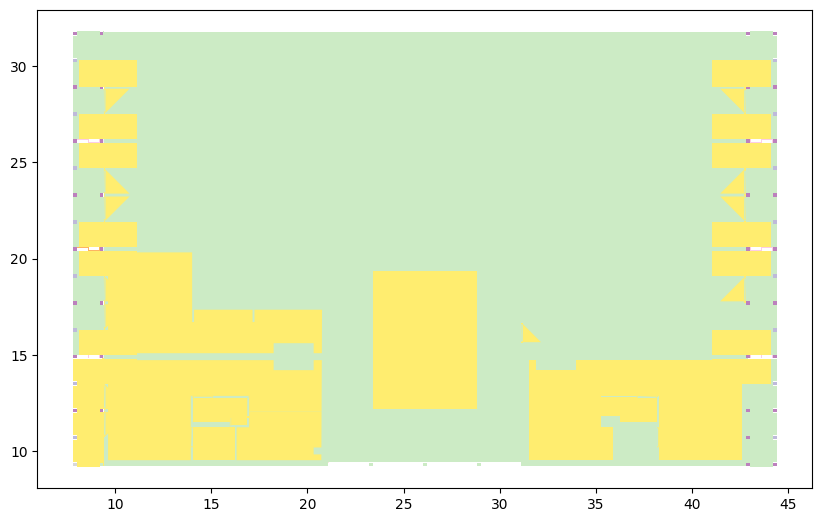

In [ ]:
#plotting the created geodataframe
gdf_floor03.plot(cmap="Set3", figsize=(10,10))

This is apparently not what we were exactly looking for, right? It looks *strange*. How to fix/improve it? We will see in the next section (2.4).

<a name="t2.4"></a>
### 2.4 **Floorplan Visualization**

In the previous plot, all of the types (IfcSpace, IfcWall, etc) were plotted on top of each other. Therefore the result was maybe not what we were looking for. Here we can select a part of the DataFrame using ***loc funtion***. Then we can repeat the process to get the desired plot.

In [ ]:
#finding data about specific ids
selected = StrijpS03_df.loc[StrijpS03_df['type'] == "IfcWall"]

#first defining the geoseries (geometrical data presented in a serie) from the WKT format
gs = gpd.GeoSeries.from_wkt(StrijpS03_df['geometry'])
#defining the GeoDataFrame using the data in the main DataFrame, geometry, and crs
gdf_test_floor = gpd.GeoDataFrame(selected, geometry=gs, crs="EPSG:28992")

#plotting the created geodataframe
gdf_test_floor.plot(cmap="tab20", figsize=(10,10))

<Axes: >

Note that the colors are assigned ***randomly*** to the elements. Try out different ***color maps*** to see the changes! In the same manner, we could have plots for different layers, to grasp a better idea of the floor plan.

In [ ]:
#finding data about specific ids
selected = StrijpS03_df.loc[StrijpS03_df['type'] == "IfcWindow"]

#first defining the geoseries (geometrical data presented in a serie) from the WKT format
gs = gpd.GeoSeries.from_wkt(StrijpS03_df['geometry'])
#defining the GeoDataFrame using the data in the main DataFrame, geometry, and crs
gdf_test_floor = gpd.GeoDataFrame(selected, geometry=gs, crs="EPSG:28992")

#plotting the created geodataframe
gdf_test_floor.plot(cmap="tab20", figsize=(10,10))

In [ ]:
#finding data about specific ids
selected = StrijpS03_df.loc[StrijpS03_df['type'] == "IfcSpace"]

#first defining the geoseries (geometrical data presented in a serie) from the WKT format
gs = gpd.GeoSeries.from_wkt(StrijpS03_df['geometry'])
#defining the GeoDataFrame using the data in the main DataFrame, geometry, and crs
gdf_test_floor = gpd.GeoDataFrame(selected, geometry=gs, crs="EPSG:28992")

#plotting the created geodataframe
gdf_test_floor.plot(cmap="Set3", figsize=(10,10))

In [ ]:
#finding data about specific ids
selected = StrijpS03_df.loc[StrijpS03_df['type'] == "IfcOpeningElement"]

#first defining the geoseries (geometrical data presented in a serie) from the WKT format
gs = gpd.GeoSeries.from_wkt(StrijpS03_df['geometry'])
#defining the GeoDataFrame using the data in the main DataFrame, geometry, and crs
gdf_test_floor = gpd.GeoDataFrame(selected, geometry=gs, crs="EPSG:28992")

#plotting the created geodataframe
gdf_test_floor.plot(cmap="Set3", figsize=(10,10))

In [ ]:
#finding data about specific ids
selected = StrijpS03_df.loc[StrijpS03_df['type'] == "IfcBuildingElementProxy"]

#first defining the geoseries (geometrical data presented in a serie) from the WKT format
gs = gpd.GeoSeries.from_wkt(StrijpS03_df['geometry'])
#defining the GeoDataFrame using the data in the main DataFrame, geometry, and crs
gdf_test_floor = gpd.GeoDataFrame(selected, geometry=gs, crs="EPSG:28992")

#plotting the created geodataframe
gdf_test_floor.plot(cmap="Set3", figsize=(10,10))

In [ ]:
#finding data about specific ids
selected = StrijpS03_df.loc[StrijpS03_df['type'] == "IfcDoor"]

#first defining the geoseries (geometrical data presented in a serie) from the WKT format
gs = gpd.GeoSeries.from_wkt(StrijpS03_df['geometry'])
#defining the GeoDataFrame using the data in the main DataFrame, geometry, and crs
gdf_test_floor = gpd.GeoDataFrame(selected, geometry=gs, crs="EPSG:28992")

#plotting the created geodataframe
gdf_test_floor.plot(cmap="Dark2", figsize=(10,10))

Sometimes, we are interested to select part of the DataFrame which does ***NOT*** have a certain feature. In this case we use the same funtion (loc) but instead of == (which means equal to), we use != (which means not equal to). Here for example, we will plot everything ***except for*** IfcSpace type:

In [ ]:
#finding data about specific ids
selected = StrijpS03_df.loc[StrijpS03_df['type'] != "IfcSpace"]

#first defining the geoseries (geometrical data presented in a serie) from the WKT format
gs = gpd.GeoSeries.from_wkt(StrijpS03_df['geometry'])
#defining the GeoDataFrame using the data in the main DataFrame, geometry, and crs
gdf_test_floor = gpd.GeoDataFrame(selected, geometry=gs, crs="EPSG:28992")

#plotting the created geodataframe
gdf_test_floor.plot(cmap="tab20", figsize=(10,10))

Remember we found out something like a pattern in ***naming convention*** in the "name" column in section 2.3.? Let's revisit it.

In [ ]:
#conditioning on one column in the DataFrame
Spaces = StrijpS03_df[StrijpS03_df['type'] == "IfcSpace"]
Spaces

It is usual for architectural firms to have some specfic ***annotation style*** for identifying spaces. In our example of KAAN Architecten residential buildings, spaces are denoted by the number of the floor, the intersection axes, and the sequence of spaces, as follows:

<center>
<img src="https://drive.google.com/uc?export=view&id=1QmFF9bVm1nSkuf4UisVSPiQcPIdycd8J" alt="floor-plan" class="center" width="px">
</center>


Let's assume we are interested in having a semantic ***color-coded map*** in which all the spaces with the same grid intersection are shown with the same color. For this purpose, we first need to categorize the data in the "name" column based on the naming convention, and then plot the DataFrame in the desired way.

In [ ]:
#adding ax_id column to the dataframe with the same values as "name" column
Spaces['ax_id'] = Spaces['name']
#let's take a look
Spaces

Here we observe that there are two main different namings among the data in the "ax-id" column. Those with only numerical values represent the unit and those with the mentioned naming style represent spaces. One way to keep the spaces in to remove all the numerical parts from the "ax_is" column and then only pay attention to the ax name.

In [ ]:
#replacing the string part of the values in the ax_id column by basically nothing
# \d+ = one or more digits
Spaces['ax_id'] = Spaces['ax_id'].str.replace('\d+', '')
#now we can remove the rows which do not have any axes name
Spaces = Spaces[Spaces['ax_id'] != ""]
#let's take a look
Spaces

In [ ]:
#replacing the ax_id column with a newly defined name specific to axes
Spaces.ax_id[Spaces["ax_id"].str.contains('A')] = "A_ax"
Spaces.ax_id[Spaces["ax_id"].str.contains('B')] = "B_ax"
Spaces.ax_id[Spaces["ax_id"].str.contains('C')] = "C_ax"
Spaces.ax_id[Spaces["ax_id"].str.contains('D')] = "D_ax"
Spaces.ax_id[Spaces["ax_id"].str.contains('E')] = "E_ax"
Spaces

Now that we have categorized the IfcSpace elements based on the naming convention, we can have a specfic plot based on the unique values in the selected column (in this case, ax_id). This type of map is called ***Choropleth*** (maps where the color of each shape is based on the value of an associated variable). Simply use the plot command with the column argument set to the column whose values you want used to assign colors.


In [ ]:
#first defining the geoseries (geometrical data presented in a serie) from the WKT format
gs = gpd.GeoSeries.from_wkt(Spaces['geometry'])
#defining the GeoDataFrame using the data in the main DataFrame, geometry, and crs
gdf_test_floor = gpd.GeoDataFrame(Spaces, geometry=gs, crs="EPSG:28992")

#plotting the created geodataframe
gdf_test_floor.plot(column="ax_id", legend = True, cmap="Set3", figsize=(10,10))

We reached our aim of having a color-coded map of the floor plan based on the naming convention. This plot, is now not only ***human-interpretable***, but also ***machine readable***! Nice, right? Of course, this was only one example to see how working with DataFrames can lead to useful plots. In general, we can modify the pandas DataFrame based on our problem formulation and when it comes to plotting, we can convert it to a GeoDataFrame.

<a name="t3"></a>
## 🟡 **Additional GeoPandas (optional)**

In this section, we play around with some other functions offered by Geopandas, using the prepared geodatasets.

In [ ]:
!pip install geodatasets

In [ ]:
#importing the geodatasets module
import geodatasets

GeoPandas inherits the standard pandas methods for indexing/selecting data. This includes label based indexing with loc and integer position based indexing with iloc, which apply to both GeoSeries and GeoDataFrame objects.

In addition to the standard pandas methods, GeoPandas also provides coordinate based indexing with the ***cx*** indexer, which slices using a bounding box. Geometries in the GeoSeries or GeoDataFrame that intersect the bounding box will be returned.

In [ ]:
#using one of geo datasets for this example
chile = gpd.read_file(geodatasets.get_path('geoda.chile_labor'))
chile.plot(figsize=(8, 8),);

In [ ]:
#selecting parts of Chile whose boundaries extend south of the -50 degrees latitude

southern_chile = chile.cx[:, :-50]

southern_chile.plot(figsize=(8, 8), cmap ='tab10');

<a name="t3.1"></a>
### 3.1 **Maps and Plots**

GeoPandas provides a high-level interface to the matplotlib library for making maps. Mapping shapes is as easy as using the plot() method on a GeoSeries or GeoDataFrame.



In [ ]:
#plotting example on Chicago
chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))
chicago.plot(cmap='tab10');


GeoPandas makes it easy to create ***Choropleth maps*** (maps where the color of each shape is based on the value of an associated variable). Simply use the plot command with the column argument set to the column whose values you want used to assign colors.

To create the Coropleth of Chicago, it's practical at first to know what are the column types that exist in the dataset. Then, we can plot the coropleth map based on the desired column.

In [ ]:
list(chicago.columns)

In [ ]:
chicago.plot(column="POP2010", figsize=(8, 8), legend = True, legend_kwds={"label": "Population in 2010", "orientation": "horizontal"});

<a name="t3.2"></a>
### 3.2 **Geometric Manipulation**

GeoPandas makes available all the tools for geometric manipulations in the Shapely library. Here we can see a number of useful functions. It is always possible to check for other functions in the documentation.

![alt text](https://geopandas.org/en/stable/_images/binary_geo-intersection.svg)


*   GeoSeries.buffer:
  Returns a GeoSeries of geometries representing all points within a given distance of each geometric object.
*   GeoSeries.boundary:
Returns a GeoSeries of lower dimensional objects representing each geometry’s set-theoretic boundary.
*   GeoSeries.centroid: Returns a GeoSeries of points for each geometric centroid.
*   GeoSeries.envelope:
Returns a GeoSeries of geometries representing the point or smallest rectangular polygon (with sides parallel to the coordinate axes) that contains each object.
*   GeoSeries.rotate: Rotate the coordinates of the GeoSeries.
*   GeoSeries.scale: Scale the geometries of the GeoSeries along each (x, y, z) dimension.

In [ ]:
#example of some geometric manipulations
from geopandas import GeoSeries
from shapely.geometry import Polygon

#let's create some polygons
p1 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p2 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
p3 = Polygon([(0, 0), (1, 0), (1, 1)])

#put them together to make a GeoSeries
g = GeoSeries([p1, p2, p3])

#it's time for plot!
g.plot(cmap='Set3')

Looks nice, right? Let's try a couple of functions on the Geoseries that we created. Here we apply rotate, scale, and buffer functions. Note that these three functions ***return a Geoseries*** and in order to *see* them, we need to plot them.

In [ ]:
#rotate the GeoSeries using the angle of rotation and the origin point
g_rotated = g.rotate(60, origin=(0, 0))
g_rotated.plot(cmap='Set3')

What is the ***reference axis*** for the rotation? And is the rotation ***clockwise or counter-clockwise***? What do you think we should do to ***change the direction of the rotation***? too many questions for a single function. But for now let's try another handy funtion, ***.scale***. To apply this function, we set the parameters as scale in x-direction, and y-direction, respectivley.

In [ ]:
#scaling a geoseries here with the magnitude of 2 in x direction
g_scale = g.scale (2,1)
g_scale.plot(cmap='Set3')

A second, where is the origin of the scale in the example above?

But what if we want ***the origin of the scale operation*** to be a certain point? Then we can specify it in the input parameters of the .scale function.

In [ ]:
g_scale = g.scale (2, 3.6, origin=(0,0))
g_scale.plot(cmap='Set3')

and as the last example here, we have .buffer funtion, which returns a GeoSeries of geometries representing all points within a given distance of each geometric object.

In [ ]:
g_buffer = g.buffer(0.8)
g_buffer.plot(cmap='Set3')

<a name="t3.3"></a>
### 3.3 **Operations with Overlay**

When working with multiple spatial datasets – especially multiple polygon or line datasets – users often wish to create new shapes based on places where those datasets overlap (or don’t overlap). These manipulations are often referred using the language of sets – intersections, unions, and differences. These types of operations are made available in the GeoPandas library through the overlay() method.

The basic idea is demonstrated by the graphic below but keep in mind that overlays operate at the DataFrame level, not on individual geometries, and the properties from both are retained. In effect, for every shape in the left GeoDataFrame, this operation is executed against every other shape in the right GeoDataFrame:


![alt text](https://geopandas.org/en/stable/_images/overlay_operations.png)


In [ ]:
# Example of overlay with the Chicago and Groceries geodatasets
chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))
groceries = gpd.read_file(geodatasets.get_path("geoda.groceries"))

# Project to crs that uses meters as distance measure
chicago = chicago.to_crs("ESRI:102003")

groceries = groceries.to_crs("ESRI:102003")

In [ ]:
# Look at Chicago:
chicago.plot(cmap='tab10');

# Now buffer groceries to find area within 1km.
# Check CRS -- USA Contiguous Albers Equal Area, units of meters.
groceries.crs

# make 1km buffer
groceries['geometry']= groceries.buffer(1000)

groceries.plot(cmap='tab10');

In [ ]:
#To select only the portion of community areas within 1km of a grocery, specify the how option to be “intersect”, which creates a new set of polygons where these two layers overlap:

chicago_cores = chicago.overlay(groceries, how='intersection')

chicago_cores.plot(alpha=0.5, edgecolor='k', cmap='tab10');

In [ ]:
#Changing the how option allows for different types of overlay operations. For example, if you were interested in the portions of Chicago far from groceries (the peripheries), you would compute the difference of the two.

chicago_peripheries = chicago.overlay(groceries, how='difference')

chicago_peripheries.plot(alpha=0.5, edgecolor='k', cmap='tab10');

You can try out the other two overlay methods (union and symmetrical difference) for yourself to see how it looks like! Also, you can think of meaningful applications of this overlay methods in architectural design process.

<a name="t4"></a>
## 📊 **Exercise**

We have already created a GeoPandas DataFrame for a single floor of one KAAN building project. Now, the aim is to pick a whole project (containing all the floors) and create a GeoDataFrame. Your team has already chosen one project. You can conveniently divided the floors among your group members. Make sure you cover the whole building! Note that you will ***create the GeoDataFrame for the whole project***, but up to 5 plots for each member of a group would suffice.

The ***shared folder*** in Drive containing the files required for all projects can be found [here](https://drive.google.com/drive/folders/1vnRCW3_-q63WfpBkD3e2Nqx1SauMH9yS?usp=sharing). You can copy the required folders for your project in your own Drive. The cleaning process will be done one the files inside the "general_csv" folder, whereas the GeoDataFrame creation will be done on the files inside the "BatchPlan_output" folder.

Keep in mind that ***every project is unique*** and might have its own characteristic and consequently require a special way of cleaning or plotting. It is recommended to coordinate among your group members to find a unified way of creating the DataFrame.


### **Evaluation**</br>
- **Loading Data (1)**
    - 1p: using a proper directory to have access to the files of the project

- **GeoDataFrame (5)**
    - 1p: creating the pandas DataFrame
    - 2p: cleaning, sorting, and selecting data in a proper way
    - 2p: creating the GeoPandas DataFrame
- **Plotting (4)**
    - 1p: plotting up to 5 (depending on the project) floor plans non-semanticly
    - 3p: define a plotting rule and plot up to 5 (depending on the project) floor plans semantically
- **Bonus⭐ (2)**
    - 1p: define an architecturally meaningful problem which can be addressed by the presented functions in section 3.
    - 1p: solve and shortly interpret it!

Your grade is equivalent to the amount of points you receive (out of 10).

⭐ For the bonus points, you may either define your geometry using polygons, or use the data of the KAAN Projects.


### **Output**</br>
**Write your findings and interpretation in a new notebook** and name it **"A2_from3Dto2D\<name\>.ipynb"**.